🧠 Purpose
To observe ensemble classification before and after boosting

To visualise patterns in your fraud data

To understand your 1-2 step analogy in practical AdaBoost executiont


✅ Sample Data:
   transaction_id  transaction_amount product_category  \
0               1              562.44             Home   
1               2             1426.12         Clothing   
2               3             1098.26             Toys   
3               4              898.39      Electronics   
4               5              234.87             Toys   

   product_category_encoded  purchase_frequency  is_fraud  
0                         3                   2         1  
1                         2                   8         0  
2                         4                   8         1  
3                         0                  17         0  
4                         4                  15         0  


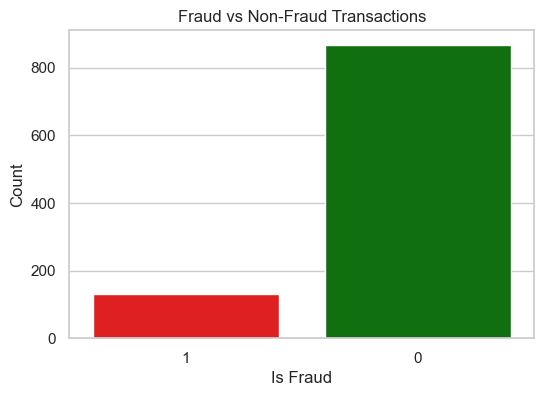

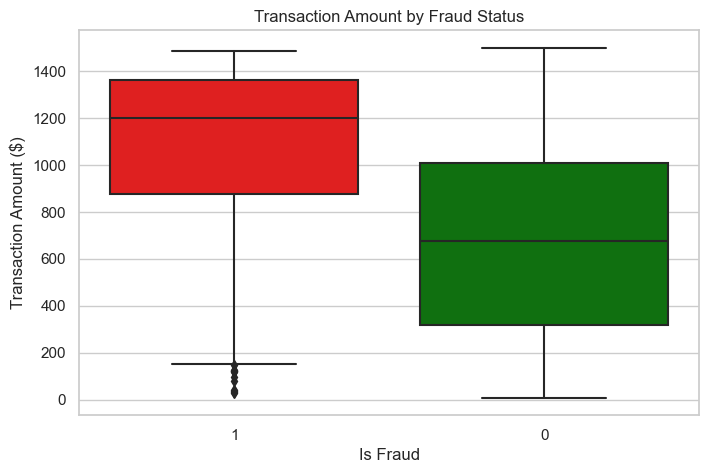


🔎 Weak Learner Alone Accuracy: 0.885

Classification Report (Weak Learner):
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       177
           1       0.00      0.00      0.00        23

    accuracy                           0.89       200
   macro avg       0.44      0.50      0.47       200
weighted avg       0.78      0.89      0.83       200


🎯 AdaBoost Ensemble Accuracy: 0.87

Classification Report (AdaBoost Ensemble):
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       177
           1       0.40      0.26      0.32        23

    accuracy                           0.87       200
   macro avg       0.65      0.61      0.62       200
weighted avg       0.85      0.87      0.86       200



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


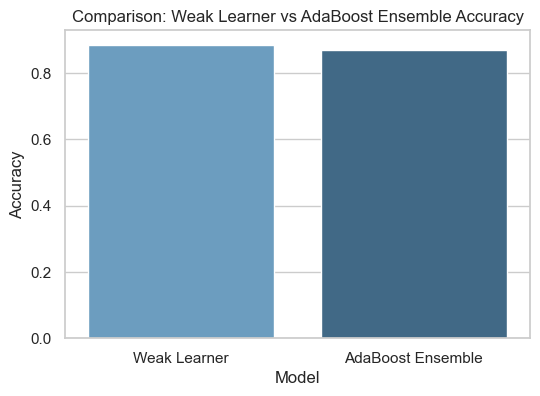

In [1]:
# --------------------------------------------
# 🚀 WebPOSAI AdaBoost Ensemble Classification
# --------------------------------------------

# 🔧 Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 📝 Seed for reproducibility
np.random.seed(42)

# --------------------------------------------
# 🛠️ Generate synthetic WebPOSAI fraud data
# --------------------------------------------

n = 1000
transaction_ids = np.arange(1, n+1)

# Random transaction amounts between $1 and $1500
transaction_amount = np.round(np.random.uniform(1, 1500, n), 2)

# Categories and encoding
categories = ['Electronics', 'Grocery', 'Clothing', 'Home', 'Toys']
category_encoded = {cat: i for i, cat in enumerate(categories)}
product_category = np.random.choice(categories, n)
product_category_encoded = [category_encoded[cat] for cat in product_category]

# Purchase frequency
purchase_frequency = np.random.randint(1, 21, n)

# Fraud label generation logic
is_fraud = []
for amt, freq in zip(transaction_amount, purchase_frequency):
    prob_fraud = 0.05
    if amt > 1000:
        prob_fraud += 0.2
    if freq < 3:
        prob_fraud += 0.15
    is_fraud.append(1 if np.random.rand() < prob_fraud else 0)

# Create DataFrame
df = pd.DataFrame({
    'transaction_id': transaction_ids,
    'transaction_amount': transaction_amount,
    'product_category': product_category,
    'product_category_encoded': product_category_encoded,
    'purchase_frequency': purchase_frequency,
    'is_fraud': is_fraud
})

print("✅ Sample Data:")
print(df.head())

# Convert is_fraud to string for Seaborn
df['is_fraud_str'] = df['is_fraud'].astype(str)

# --------------------------------------------
# 📊 Visualisation: Fraud distribution
# --------------------------------------------

sns.set(style="whitegrid")

# Fraud count
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud_str', data=df, palette={"0": "green", "1": "red"})
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

# Transaction amount by fraud
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud_str', y='transaction_amount', data=df, palette={"0": "green", "1": "red"})
plt.title("Transaction Amount by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount ($)")
plt.show()

# --------------------------------------------
# 🤖 Ensemble Step 1: Weak Learner Alone
# --------------------------------------------

# Features and target
X = df[['transaction_amount', 'product_category_encoded', 'purchase_frequency']]
y = df['is_fraud'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define **single weak learner** (decision stump)
weak_learner = DecisionTreeClassifier(max_depth=1)
weak_learner.fit(X_train, y_train)
y_pred_weak = weak_learner.predict(X_test)

print("\n🔎 Weak Learner Alone Accuracy:", accuracy_score(y_test, y_pred_weak))
print("\nClassification Report (Weak Learner):\n", classification_report(y_test, y_pred_weak))

# --------------------------------------------
# 🤖 Ensemble Step 2: AdaBoost Combining Weak Learners
# --------------------------------------------

# Define AdaBoost model with multiple weak learners combined
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Train AdaBoost model
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

print("\n🎯 AdaBoost Ensemble Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nClassification Report (AdaBoost Ensemble):\n", classification_report(y_test, y_pred_ada))

# --------------------------------------------
# 📈 Visualisation: Compare Weak Learner vs AdaBoost
# --------------------------------------------

results_df = pd.DataFrame({
    'Model': ['Weak Learner', 'AdaBoost Ensemble'],
    'Accuracy': [accuracy_score(y_test, y_pred_weak), accuracy_score(y_test, y_pred_ada)]
})

plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette="Blues_d")
plt.title("Comparison: Weak Learner vs AdaBoost Ensemble Accuracy")
plt.ylabel("Accuracy")
plt.show()
